In [1]:
#q1
from scipy import stats
import numpy as np

# Simulated sample data
sample = np.random.normal(loc=50, scale=10, size=30)
population_mean = 52
population_std = 10  # known

# Z-test calculation
z_stat = (np.mean(sample) - population_mean) / (population_std / np.sqrt(len(sample)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed

print(f"Z-statistic: {z_stat:.2f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Z-statistic: -1.61, P-value: 0.1072
Fail to reject the null hypothesis


In [2]:
#q2
np.random.seed(42)
sample = np.random.normal(100, 15, 50)
mean = np.mean(sample)
std = np.std(sample, ddof=1)
print(f"Sample Mean: {mean:.2f}, Sample Std: {std:.2f}")


Sample Mean: 96.62, Sample Std: 14.01


In [3]:
#q3
def one_sample_z_test(sample, population_mean, population_std):
    z_stat = (np.mean(sample) - population_mean) / (population_std / np.sqrt(len(sample)))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
    return z_stat, p_value

z, p = one_sample_z_test(sample, 100, 15)
print(f"Z = {z:.2f}, P = {p:.4f}")


Z = -1.59, P = 0.1109


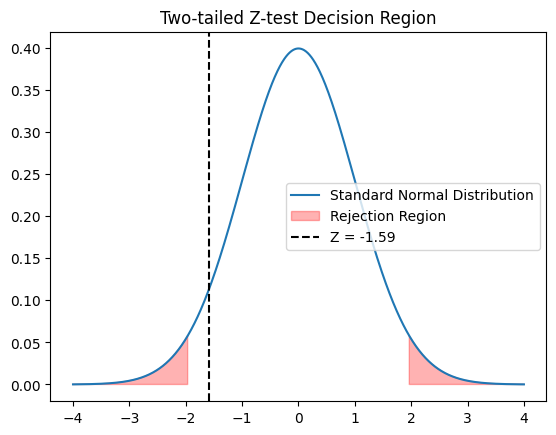

In [4]:
#q4
import matplotlib.pyplot as plt

def plot_z_test(z_stat):
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x)
    plt.plot(x, y, label='Standard Normal Distribution')
    plt.fill_between(x, y, where=(x < -1.96) | (x > 1.96), color='red', alpha=0.3, label='Rejection Region')
    plt.axvline(z_stat, color='black', linestyle='--', label=f'Z = {z_stat:.2f}')
    plt.legend()
    plt.title("Two-tailed Z-test Decision Region")
    plt.show()

plot_z_test(z)


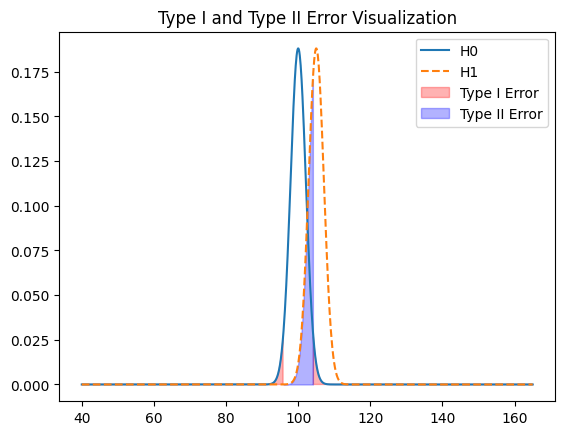

In [5]:
#q5
def type1_type2_errors(mu0, mu1, sigma, n, alpha=0.05):
    x = np.linspace(mu0 - 4*sigma, mu1 + 4*sigma, 1000)
    se = sigma / np.sqrt(n)
    
    z_critical = stats.norm.ppf(1 - alpha/2)
    upper = mu0 + z_critical * se
    lower = mu0 - z_critical * se

    plt.plot(x, stats.norm.pdf(x, mu0, se), label="H0")
    plt.plot(x, stats.norm.pdf(x, mu1, se), label="H1", linestyle='--')
    plt.fill_between(x, stats.norm.pdf(x, mu0, se), where=(x < lower) | (x > upper), color='red', alpha=0.3, label="Type I Error")
    plt.fill_between(x, stats.norm.pdf(x, mu1, se), where=(x >= lower) & (x <= upper), color='blue', alpha=0.3, label="Type II Error")
    plt.legend()
    plt.title("Type I and Type II Error Visualization")
    plt.show()

type1_type2_errors(mu0=100, mu1=105, sigma=15, n=50)


In [6]:
#q6
group1 = np.random.normal(100, 15, 30)
group2 = np.random.normal(105, 15, 30)

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")


T-statistic: -1.13, P-value: 0.2617


Paired T-test: T = 5.12, P = 0.0000


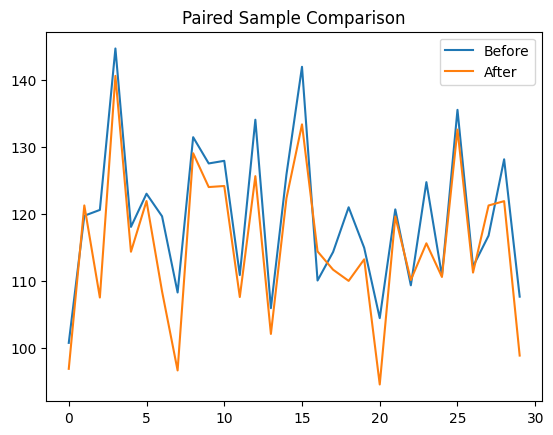

In [7]:
#q7
before = np.random.normal(120, 10, 30)
after = before + np.random.normal(-5, 5, 30)

t_stat, p_val = stats.ttest_rel(before, after)
print(f"Paired T-test: T = {t_stat:.2f}, P = {p_val:.4f}")

plt.plot(before, label="Before")
plt.plot(after, label="After")
plt.legend()
plt.title("Paired Sample Comparison")
plt.show()


In [8]:
#q8
sample = np.random.normal(100, 15, 20)
# Z-test (assume known std dev = 15)
z, p_z = one_sample_z_test(sample, 100, 15)

# T-test
t, p_t = stats.ttest_1samp(sample, 100)

print(f"Z-test: Z = {z:.2f}, P = {p_z:.4f}")
print(f"T-test: T = {t:.2f}, P = {p_t:.4f}")


Z-test: Z = 0.29, P = 0.7723
T-test: T = 0.30, P = 0.7704


In [9]:
#q9
def confidence_interval(sample, confidence=0.95):
    mean = np.mean(sample)
    se = stats.sem(sample)
    margin = stats.t.ppf((1 + confidence) / 2., len(sample)-1) * se
    return mean - margin, mean + margin

ci = confidence_interval(sample)
print(f"95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})")


95% Confidence Interval: (94.11, 107.83)


In [10]:
#q10
from scipy import stats
import numpy as np

def margin_of_error(sample, confidence=0.95):
    se = stats.sem(sample)
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(sample) - 1)
    moe = t_critical * se
    return moe

sample = np.random.normal(100, 15, 30)
print(f"Margin of Error: {margin_of_error(sample):.2f}")


Margin of Error: 5.60


In [11]:
#q11
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    p_not_a = 1 - p_a
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    return (p_b_given_a * p_a) / p_b

# Example: Disease testing
# P(Disease), P(Positive|Disease), P(Positive|No Disease)
posterior = bayes_theorem(0.01, 0.99, 0.05)
print(f"Posterior Probability (P(Disease|Positive)): {posterior:.4f}")


Posterior Probability (P(Disease|Positive)): 0.1667


In [12]:
#q12
import pandas as pd
from scipy.stats import chi2_contingency

data = pd.DataFrame({
    "Gender": ["Male", "Male", "Female", "Female"],
    "Preference": ["A", "B", "A", "B"],
    "Count": [20, 30, 25, 25]
})
contingency_table = pd.pivot_table(data, values='Count', index='Gender', columns='Preference')
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p:.4f}")


Chi2 Statistic: 0.65, P-value: 0.4214


In [13]:
#q13
import pandas as pd
from scipy.stats import chi2_contingency

data = pd.DataFrame({
    "Gender": ["Male", "Male", "Female", "Female"],
    "Preference": ["A", "B", "A", "B"],
    "Count": [20, 30, 25, 25]
})
contingency_table = pd.pivot_table(data, values='Count', index='Gender', columns='Preference')
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2:.2f}, P-value: {p:.4f}")


Chi2 Statistic: 0.65, P-value: 0.4214


In [14]:
#q14
observed = np.array([[20, 30], [25, 25]])
chi2, p, dof, expected = chi2_contingency(observed)
print("Expected Frequencies:\n", expected)


Expected Frequencies:
 [[22.5 27.5]
 [22.5 27.5]]


In [15]:
#q15
observed = [50, 30, 20]
expected = [40, 40, 20]
chi2_stat, p = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 = {chi2_stat:.2f}, P-value = {p:.4f}")


Chi2 = 5.00, P-value = 0.0821


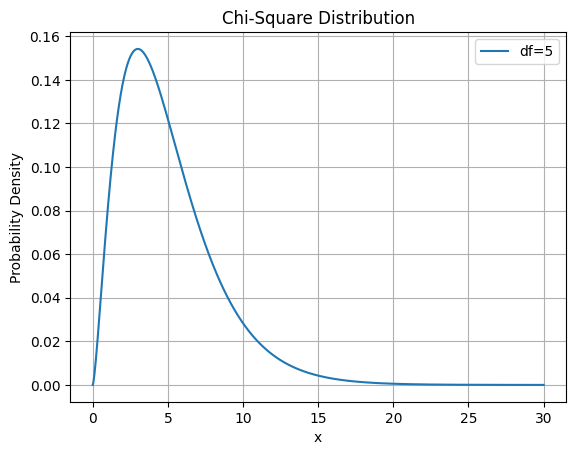

In [16]:
#q16
import matplotlib.pyplot as plt
x = np.linspace(0, 30, 1000)
df = 5
plt.plot(x, stats.chi2.pdf(x, df), label=f'df={df}')
plt.title("Chi-Square Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()


In [17]:
#q17
sample1 = np.random.normal(100, 10, 30)
sample2 = np.random.normal(100, 15, 30)

f_stat = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
df1, df2 = len(sample1)-1, len(sample2)-1
p = 1 - stats.f.cdf(f_stat, df1, df2)
print(f"F = {f_stat:.2f}, P = {p:.4f}")


F = 0.39, P = 0.9937


In [18]:
#q18
group1 = np.random.normal(100, 10, 30)
group2 = np.random.normal(102, 10, 30)
group3 = np.random.normal(98, 10, 30)

f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f"ANOVA F = {f_stat:.2f}, P = {p_val:.4f}")


ANOVA F = 5.16, P = 0.0076


C:\Users\DELL\AppData\Local\Temp\ipykernel_9052\943902620.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=["Group1", "Group2", "Group3"])


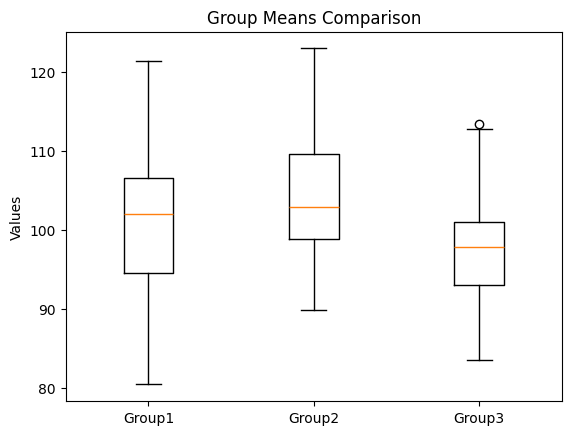

In [19]:
#q19
plt.boxplot([group1, group2, group3], labels=["Group1", "Group2", "Group3"])
plt.title("Group Means Comparison")
plt.ylabel("Values")
plt.show()


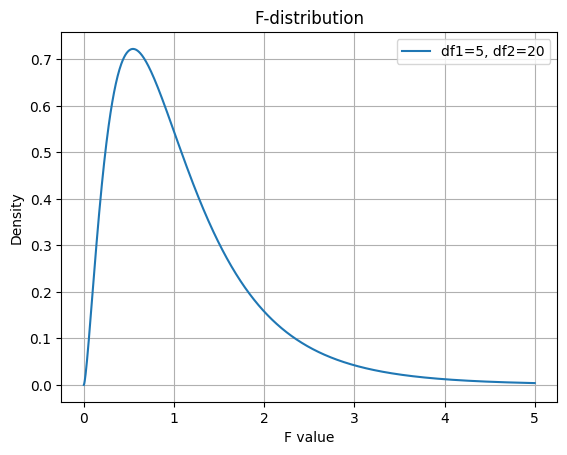

In [21]:
#q22
x = np.linspace(0, 5, 1000)
plt.plot(x, stats.f.pdf(x, dfn=5, dfd=20), label="df1=5, df2=20")
plt.title("F-distribution")
plt.xlabel("F value")
plt.ylabel("Density")
plt.grid()
plt.legend()
plt.show()



In [22]:
#q23
data = np.random.normal(100, 10, 50)
t_stat, p_val = stats.ttest_1samp(data, 100)
print(f"T = {t_stat:.2f}, P = {p_val:.4f}")


T = 0.74, P = 0.4641


In [23]:
#q24
sample = np.random.normal(100, 10, 30)
sample_var = np.var(sample, ddof=1)
n = len(sample)
hypothesized_var = 100

chi2 = (n - 1) * sample_var / hypothesized_var
p = 1 - stats.chi2.cdf(chi2, df=n-1)
print(f"Chi2 = {chi2:.2f}, P = {p:.4f}")


Chi2 = 40.99, P = 0.0689


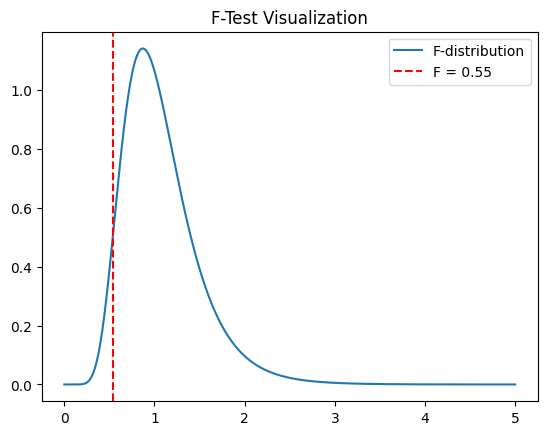

In [24]:
#q26
sample1 = np.random.normal(100, 12, 30)
sample2 = np.random.normal(100, 18, 30)

f = np.var(sample1, ddof=1) / np.var(sample2, ddof=1)
df1, df2 = len(sample1)-1, len(sample2)-1

x = np.linspace(0, 5, 1000)
plt.plot(x, stats.f.pdf(x, df1, df2), label='F-distribution')
plt.axvline(f, color='red', linestyle='--', label=f'F = {f:.2f}')
plt.legend()
plt.title("F-Test Visualization")
plt.show()


In [25]:
#q27
observed = np.random.multinomial(100, [0.2, 0.5, 0.3])
expected = [20, 50, 30]
chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 = {chi2_stat:.2f}, P = {p_val:.4f}")


Chi2 = 0.43, P = 0.8065
